In [1]:
#from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
# %matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from numpy import sqrt
%matplotlib inline
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [2]:
data2015 = load_dataset('/Users/carlo/OneDrive/Escritorio/UNI/TERCERO/AP/kaggle/2015_Financial_Data.csv')
data_values = data2015.values
data2015.dataframeName = '2015_Financial_Data.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2015.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4120, 225)
Dimensionalitat de les entrades X (4120, 2)
Dimensionalitat de l'atribut Y (4120,)


In [3]:
data2015.head(10)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2016 PRICE VAR [%],Class
0,PG,70749000000.000,-0.049,37056000000.000,33693000000.000,0.000,20616000000.000,22644000000.000,11049000000.000,626000000.000,...,-0.285,-0.263,-0.102,-0.101,-0.143,0.000,-0.039,Consumer Defensive,10.809,1
1,VIPS,6193685410.568,0.659,4669037590.510,1524647820.059,165848097.366,522387921.738,1205660144.816,318987675.243,13212448.005,...,28.676,0.214,0.128,0.295,0.028,0.531,0.518,Consumer Defensive,-21.637,0
2,KR,108465000000.000,0.103,85512000000.000,22953000000.000,0.000,17161000000.000,19816000000.000,3137000000.000,488000000.000,...,0.134,0.006,0.042,0.053,0.025,0.000,0.129,Consumer Defensive,-15.037,0
3,RAD,26528377000.000,0.039,18951645000.000,7576732000.000,0.000,6695642000.000,6733788000.000,842944000.000,397612000.000,...,0.034,-0.037,0.264,1.027,-0.034,0.000,0.021,Consumer Defensive,4.304,1
4,GIS,17630300000.000,-0.016,11681100000.000,5949200000.000,0.000,3328000000.000,3871900000.000,2077300000.000,315400000.000,...,-0.065,-0.012,-0.057,-0.212,0.046,0.000,-0.042,Consumer Defensive,10.693,1
5,PM,73908000000.000,-0.077,56479000000.000,17429000000.000,0.000,6656000000.000,6806000000.000,10623000000.000,1008000000.000,...,-0.306,-0.014,-0.035,-0.052,-0.033,0.000,-0.049,Consumer Defensive,10.866,1
6,KO,44294000000.000,-0.037,17482000000.000,26812000000.000,0.000,16427000000.000,18084000000.000,8728000000.000,856000000.000,...,-0.118,-0.064,-0.022,-0.150,0.057,0.000,-0.046,Consumer Defensive,0.959,1
7,WMT,485651000000.000,0.020,365086000000.000,120565000000.000,0.000,93418000000.000,93418000000.000,27147000000.000,2461000000.000,...,0.015,0.006,-0.006,0.080,-0.114,0.000,0.023,Consumer Defensive,15.729,1
8,MDLZ,29636000000.000,-0.135,18124000000.000,11512000000.000,0.000,7577000000.000,9437000000.000,2075000000.000,1013000000.000,...,-0.191,-0.250,-0.059,0.067,-0.075,0.000,-0.104,Consumer Defensive,2.977,1
9,MO,25434000000.000,0.037,14320000000.000,11114000000.000,0.000,2708000000.000,2712000000.000,8402000000.000,817000000.000,...,0.000,-0.004,-0.087,-0.037,-0.126,0.000,0.067,Consumer Defensive,22.158,1


In [21]:
corr = data2015.corr()
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2016 PRICE VAR [%],Class
Revenue,1.000,-0.022,0.986,0.832,0.428,0.551,0.784,0.596,0.572,0.598,...,0.072,-0.020,-0.008,-0.022,-0.004,-0.006,-0.013,-0.012,-0.003,0.031
Revenue Growth,-0.022,1.000,-0.019,-0.022,-0.008,-0.018,-0.022,-0.013,-0.018,-0.011,...,-0.002,0.406,0.796,0.091,0.010,-0.001,0.007,0.015,-0.001,-0.060
Cost of Revenue,0.986,-0.019,1.000,0.728,0.381,0.435,0.588,0.400,0.549,0.415,...,0.060,-0.017,-0.007,-0.018,-0.004,-0.005,-0.011,-0.010,-0.002,0.029
Gross Profit,0.832,-0.022,0.728,1.000,0.494,0.814,0.928,0.789,0.527,0.770,...,0.075,-0.020,-0.009,-0.024,-0.005,-0.007,-0.013,-0.014,-0.004,0.034
R&D Expenses,0.428,-0.008,0.381,0.494,1.000,0.297,0.358,0.347,0.229,0.412,...,0.029,-0.009,-0.003,-0.009,-0.003,-0.003,-0.003,-0.006,-0.003,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debt Growth,-0.006,-0.001,-0.005,-0.007,-0.003,-0.006,-0.007,-0.005,-0.006,-0.004,...,-0.004,-0.001,0.001,-0.005,-0.001,1.000,0.036,0.012,-0.001,-0.026
R&D Expense Growth,-0.013,0.007,-0.011,-0.013,-0.003,-0.012,-0.012,-0.010,-0.009,-0.009,...,-0.056,0.008,-0.001,0.046,-0.191,0.036,1.000,0.060,-0.001,-0.028
SG&A Expenses Growth,-0.012,0.015,-0.010,-0.014,-0.006,-0.012,-0.013,-0.010,-0.011,-0.010,...,0.000,0.013,0.016,0.036,0.085,0.012,0.060,1.000,-0.001,-0.053
2016 PRICE VAR [%],-0.003,-0.001,-0.002,-0.004,-0.003,-0.005,-0.004,-0.004,-0.003,-0.005,...,-0.058,-0.002,-0.003,-0.002,-0.001,-0.001,-0.001,-0.001,1.000,0.023


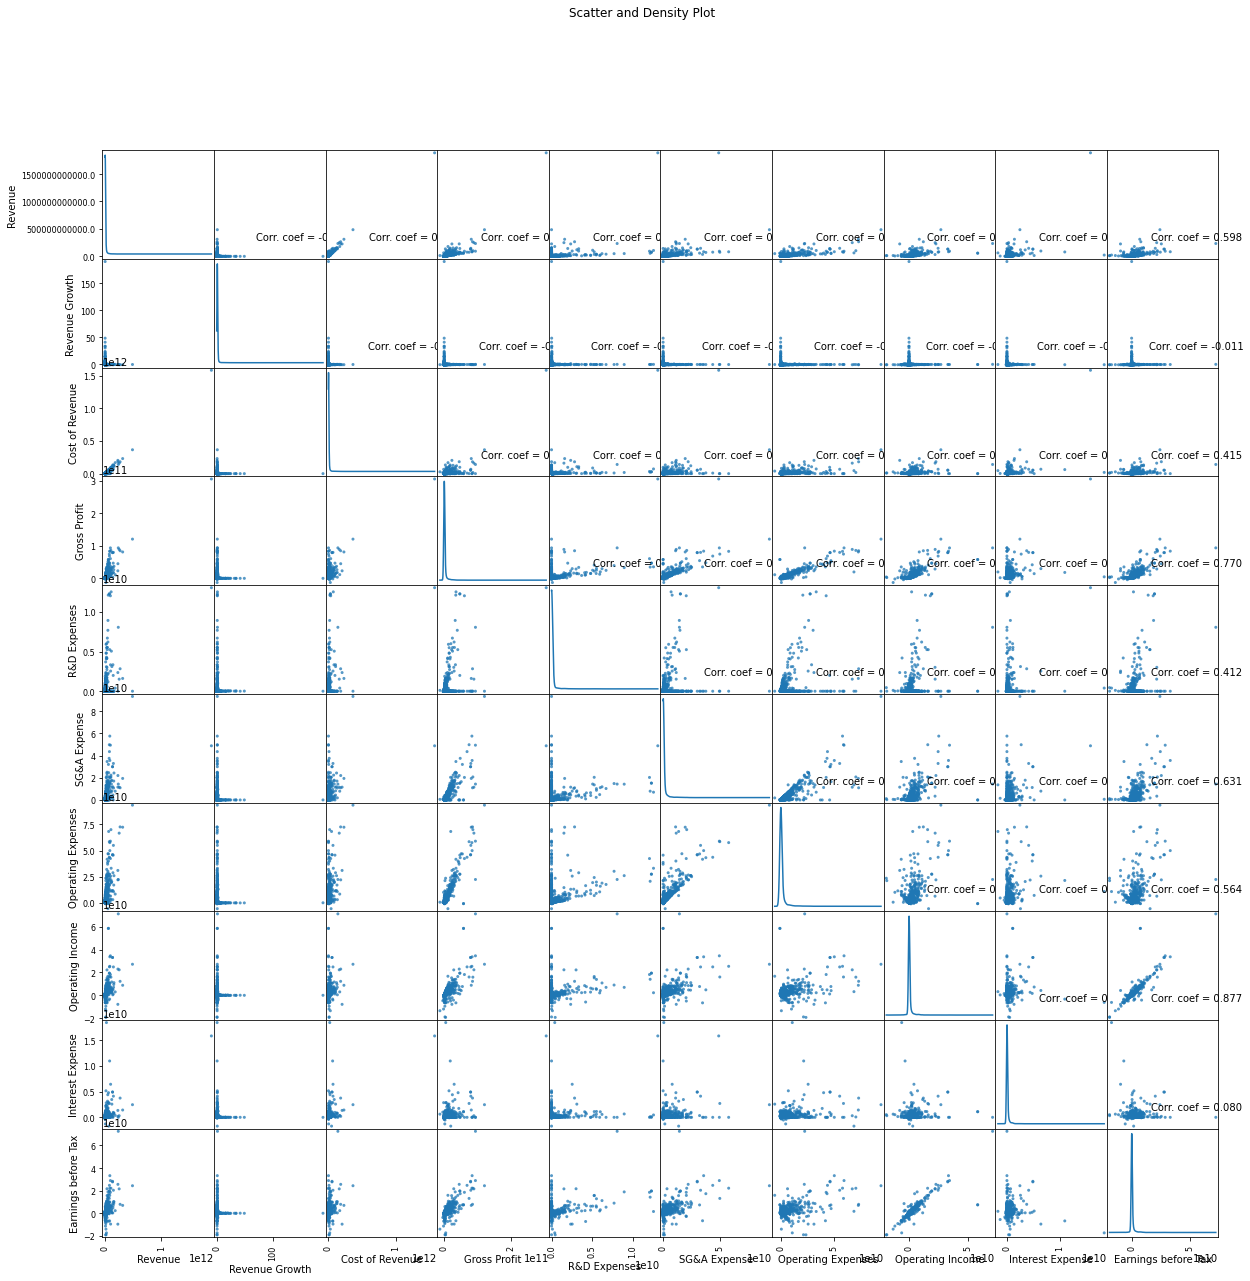

In [4]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1, how='all') # drop columns with NaN7
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(data2015, 20, 10)

##  Data Cleaning

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


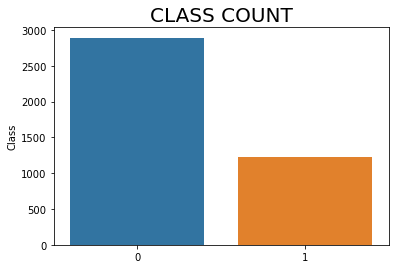

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


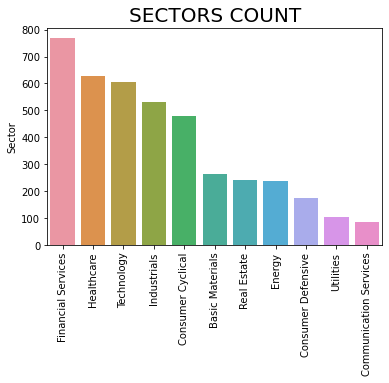

In [23]:
import seaborn as sns## Limpiamos datos
# Plot class distribution
df2015_class = data2015['Class'].value_counts()
sns.barplot(np.arange(len(df2015_class)), df2015_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df2015_sector = data2015['Sector'].value_counts()
sns.barplot(np.arange(len(df2015_sector)), df2015_sector)
plt.xticks(np.arange(len(df2015_sector)), df2015_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [24]:
df2015_class

1    2891
0    1229
Name: Class, dtype: int64

The plots above show that:

1. the samples are not balanced in terms of class. Indeed, 2891 samples belong to class 0, which as explained in the documentation of the dataset correspond to stocks that are not buy-worthy. At the same time, 1229 samples belong to class 1, meaning they are buy-worthy stocks. This should be accounted for when splitting the data between training and testing data (it is useful to use the stratify option available within sklearn.model_selection.train_test_split).
2. there is a total of 11 sectors, 4 of them with about 500+ stocks each, while the remaining 6 sectors have less than 300 stocks. In particular, the sectors Utilities and Communication Services have around 100 samples. This has to be kept in mind if we want to use this data with ML algorithms: there are very few samples, which could lead to overfitting, etc.

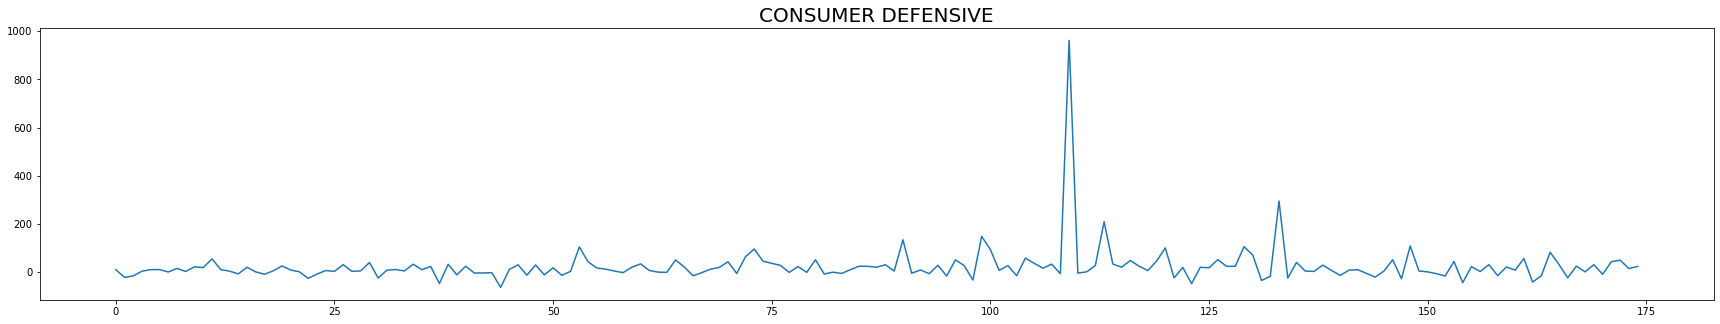

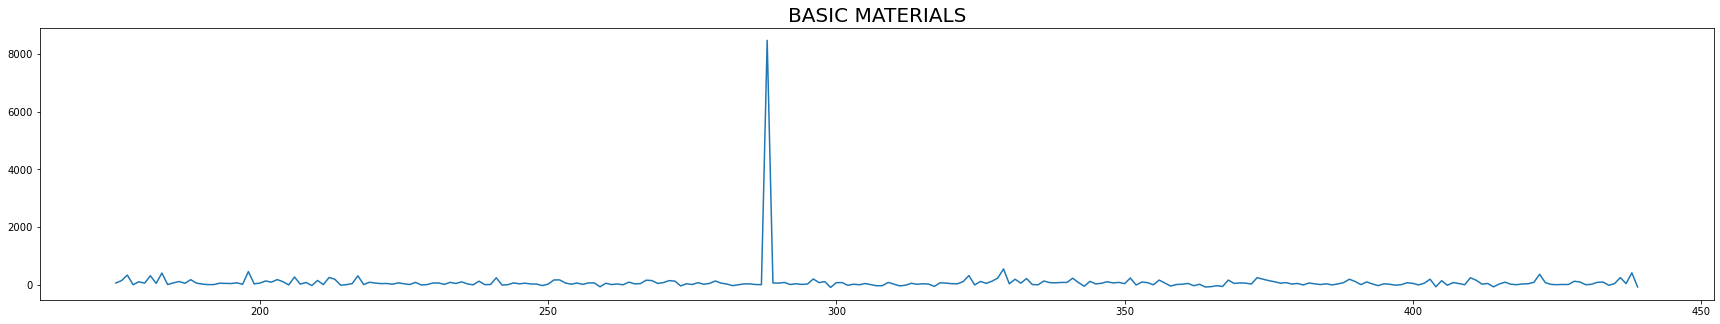

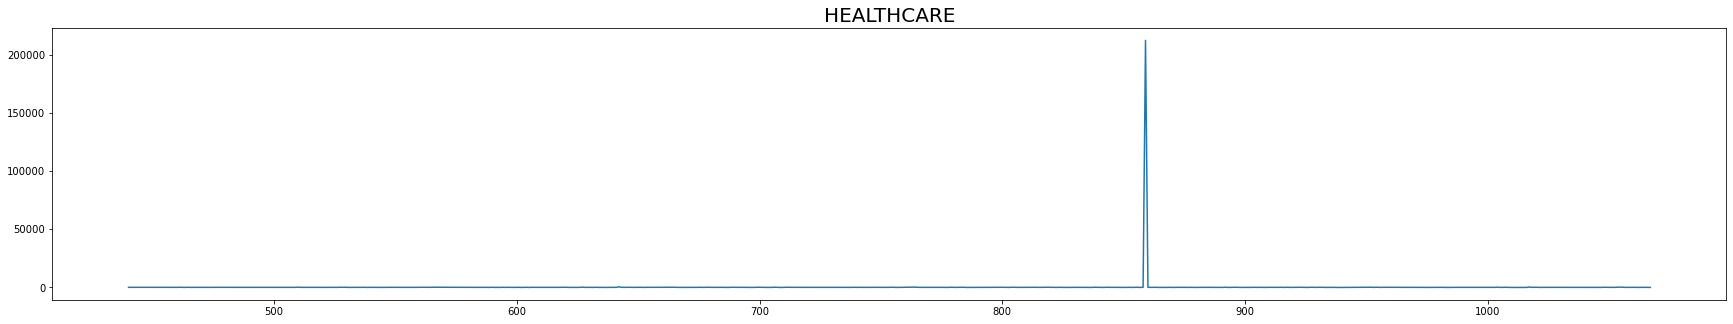

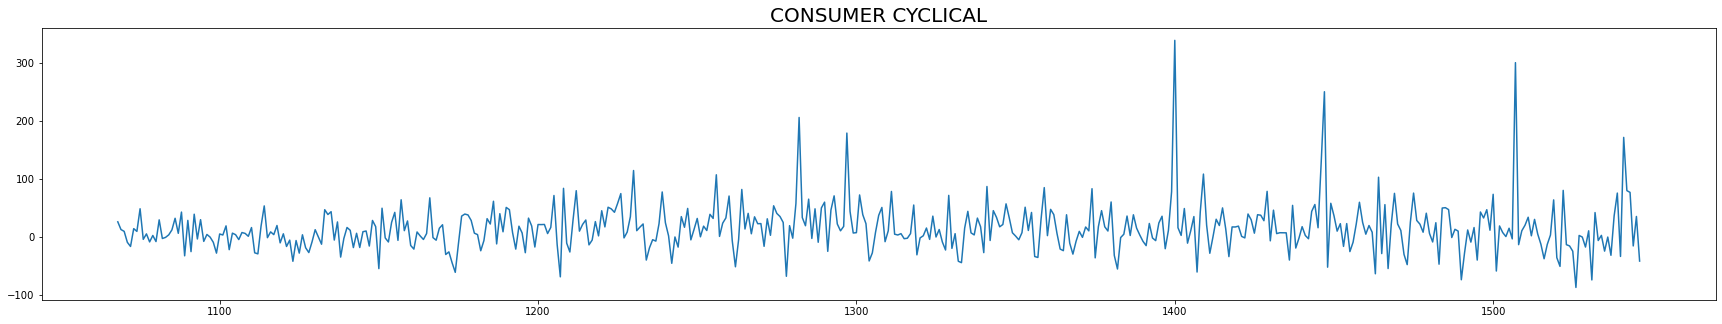

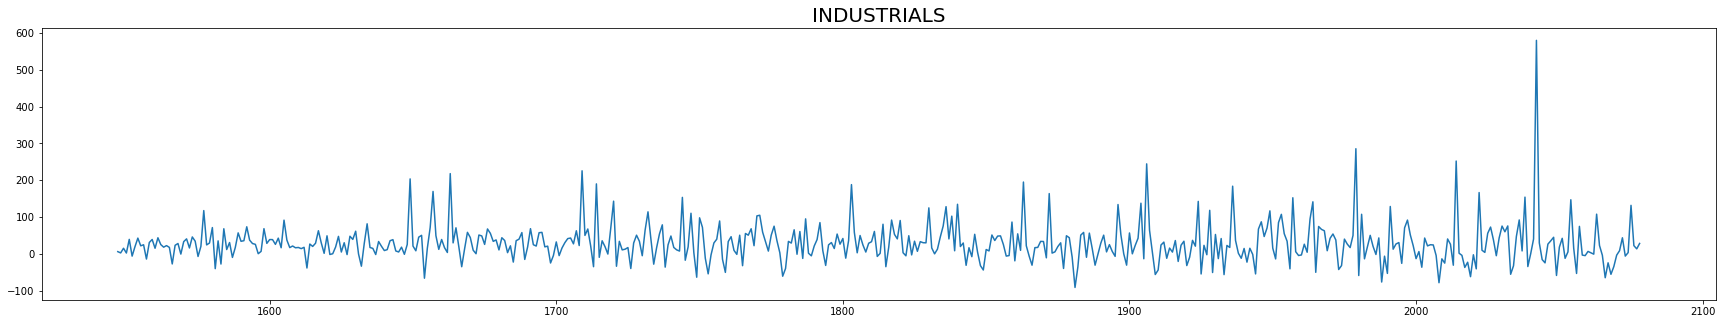

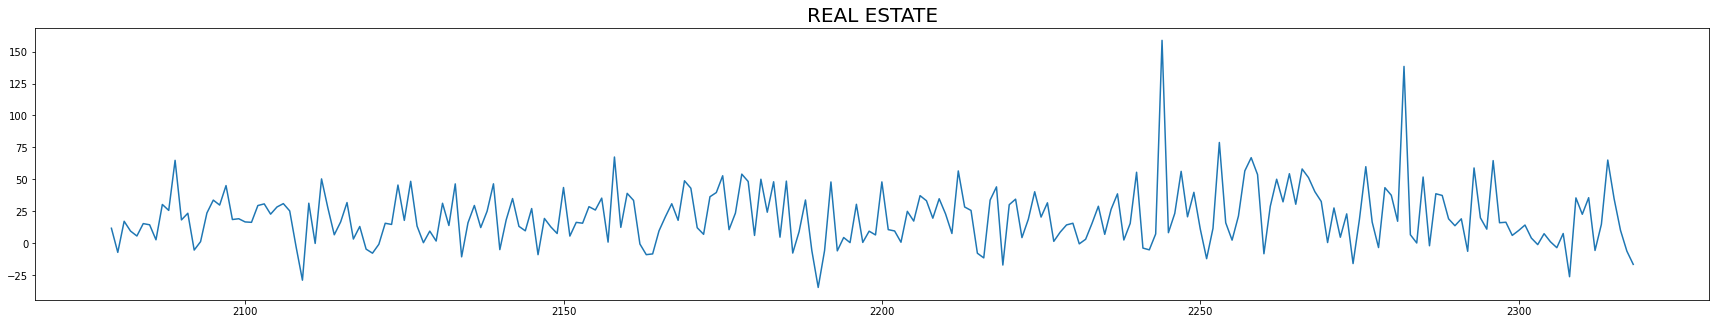

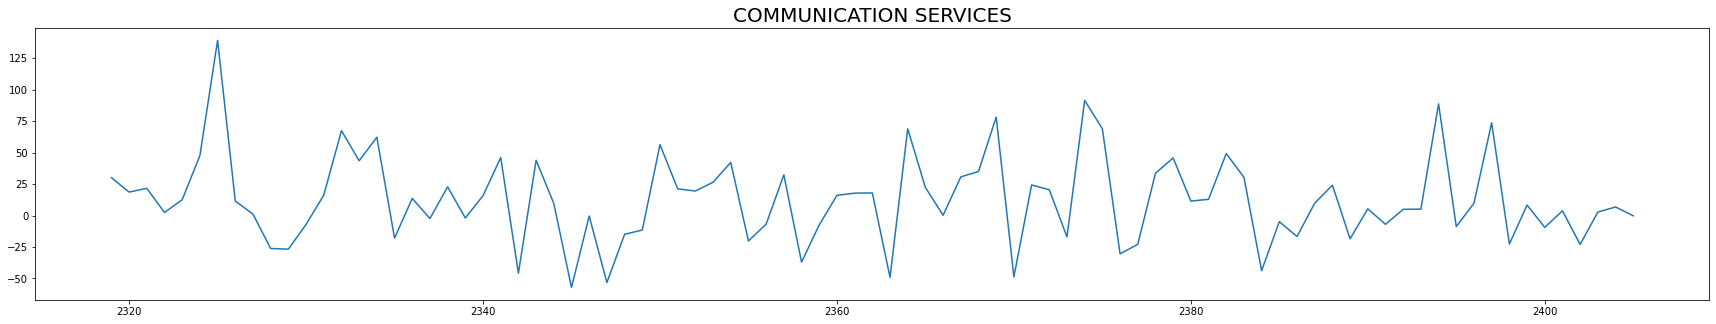

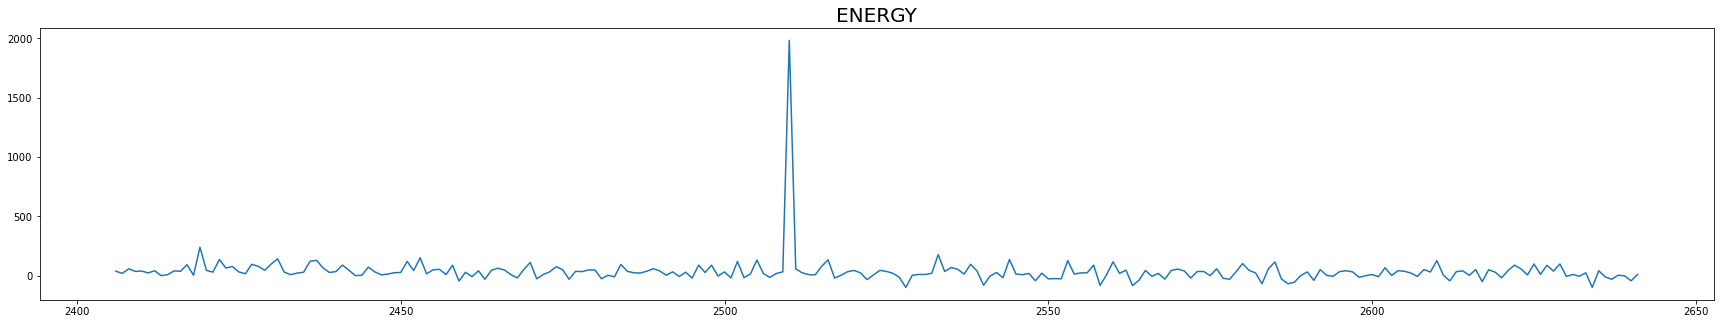

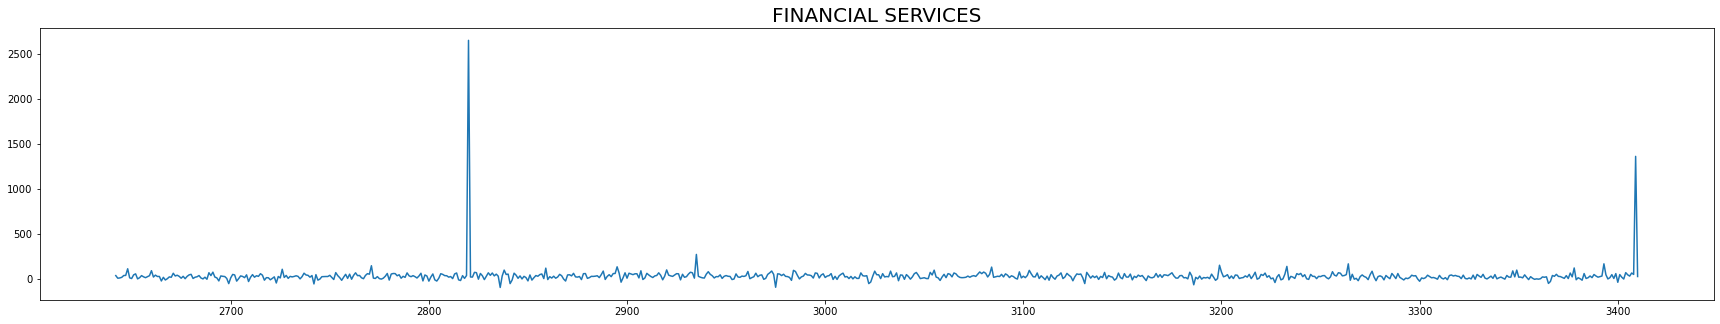

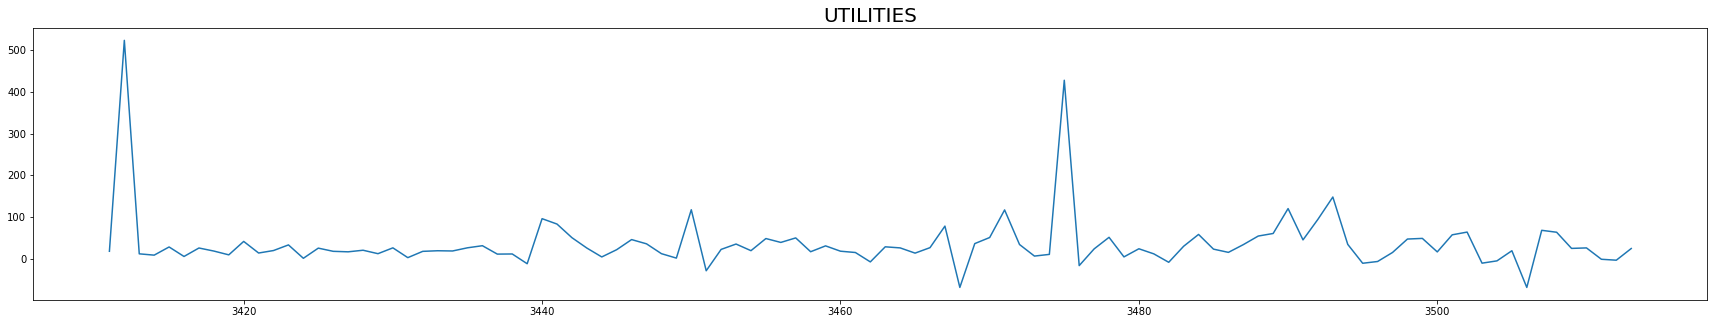

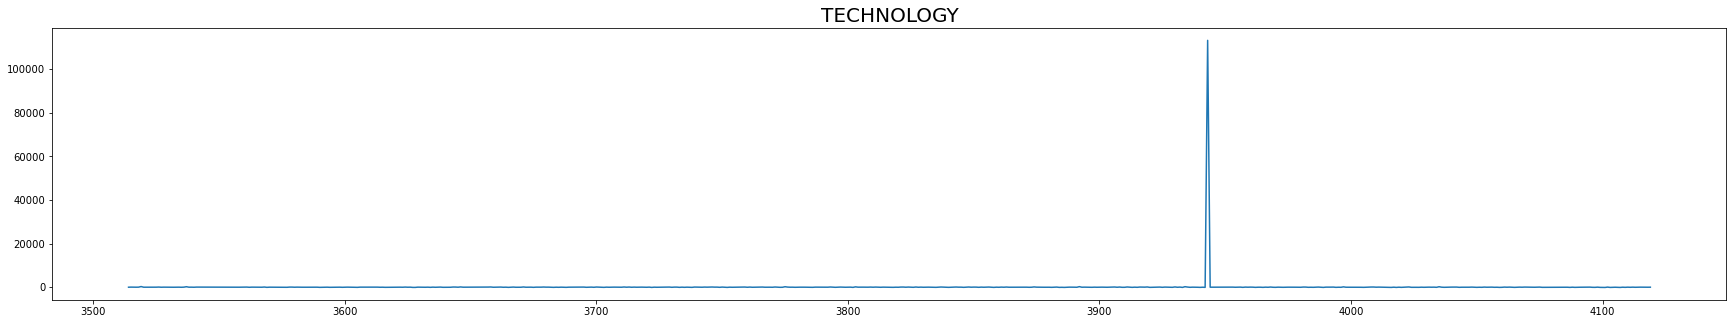

In [25]:
# Extract the columns we need in this step from the dataframe
df2015_ = data2015.loc[:, ['Sector', '2016 PRICE VAR [%]']]

# Get list of sectors
sector_list = df2015_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df2015_[df2015_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Thanks to this check, we can clearly see that there are indeed some major peaks in the following sectors:

Consumer Defensive Basic Materials Healthcare Consumer Cyclical Industrials Real Estate Energy Financial Services Utilities Technology This means that, for one reason or another, some stocks experienced incredible gains. However, how can be sure that each of these gains is organic (i.e. due to trading activity)?

We can take a closer look at this situation by plotting the price trend for those stocks that increased their value by more than 500% during 2015. While it is possible for a stock to experience such gains, I'd still like to verify it with my eyes.

Here, we will use pandas_datareader to pull the Adjusted Close daily price, during 2016, of the required stocks. To further investigate these stocks, I think it is worth to plot the Volume too.

In [26]:
# Get stocks that increased more than 500%
from pandas_datareader import data

gain = 500
top_gainers = df2015_[df2015_['2016 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2016 PRICE VAR [%]'].sort_values(ascending=False) 
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

10 STOCKS with more than 500% gain.



In [27]:
indices = list(df2015_[df2015_['2016 PRICE VAR [%]'] >= 500].index)
excess_ret_tickers = list(data2015.loc[indices, :].iloc[:, 0])
excess_ret_tickers

['NBEV', 'ARCH', 'NAK', 'ARA', 'GLBS', 'TELL', 'NTB', 'WINS', 'VST', 'LN']

None of these seem to have an organic growth so we proceed to remove them

In [28]:
tickers = top_gainers.index.values.tolist()

print(tickers)
data2015.drop(tickers, axis=0, inplace=True)

[859, 3943, 288, 2820, 2510, 3409, 109, 2042, 329, 3412]


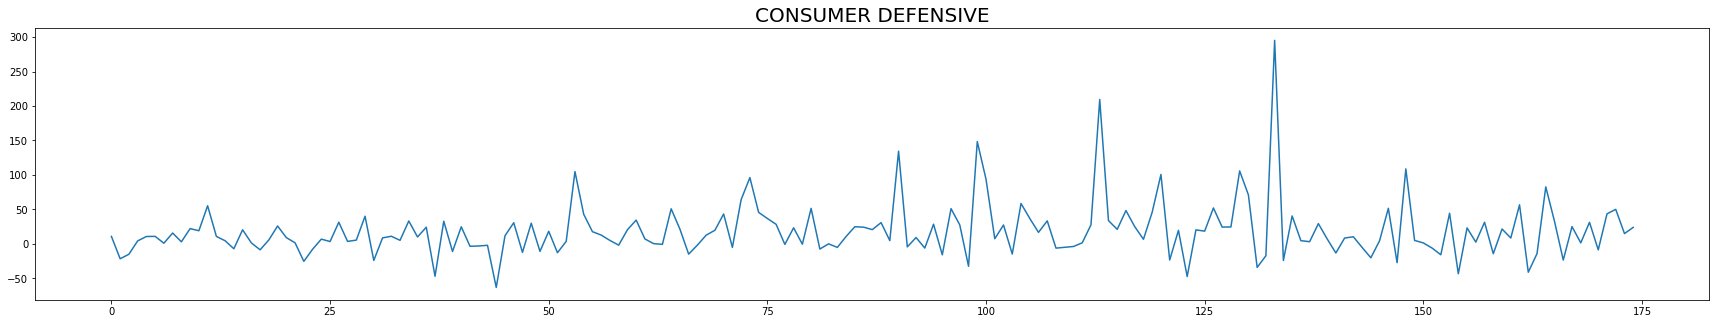

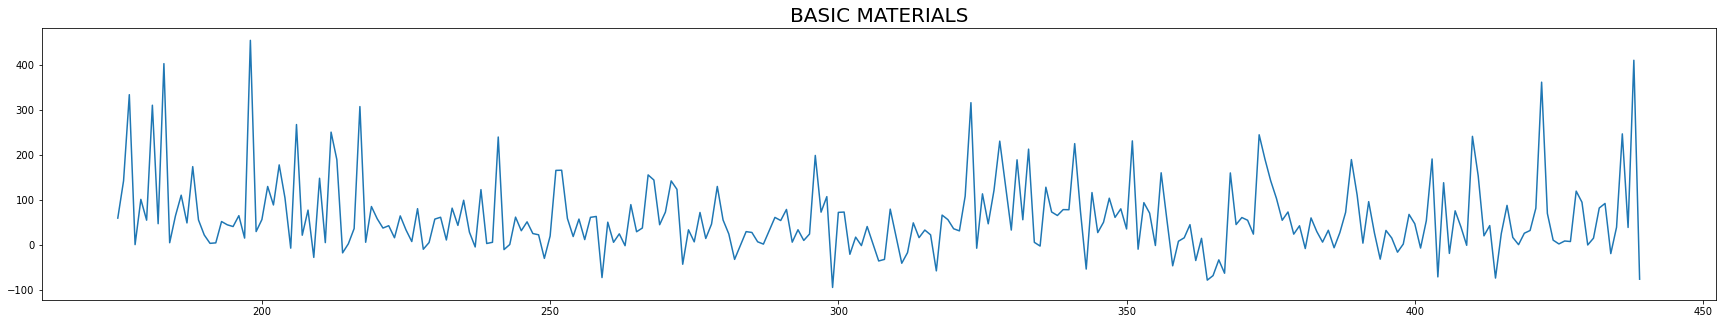

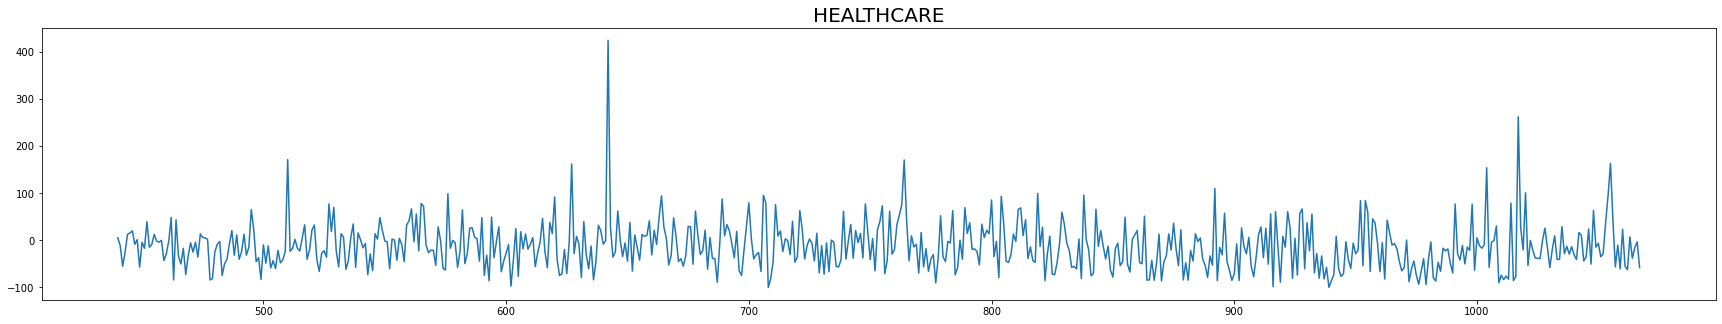

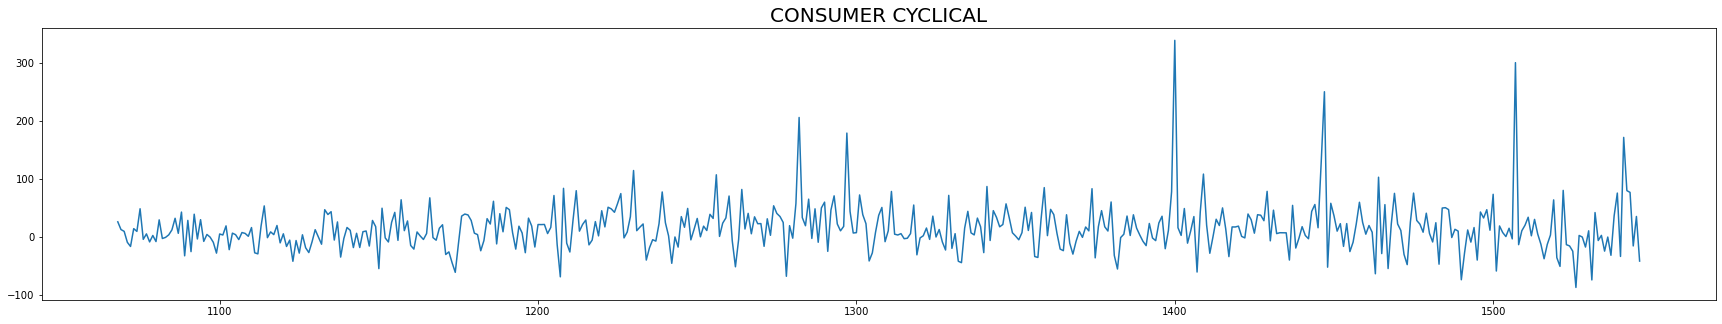

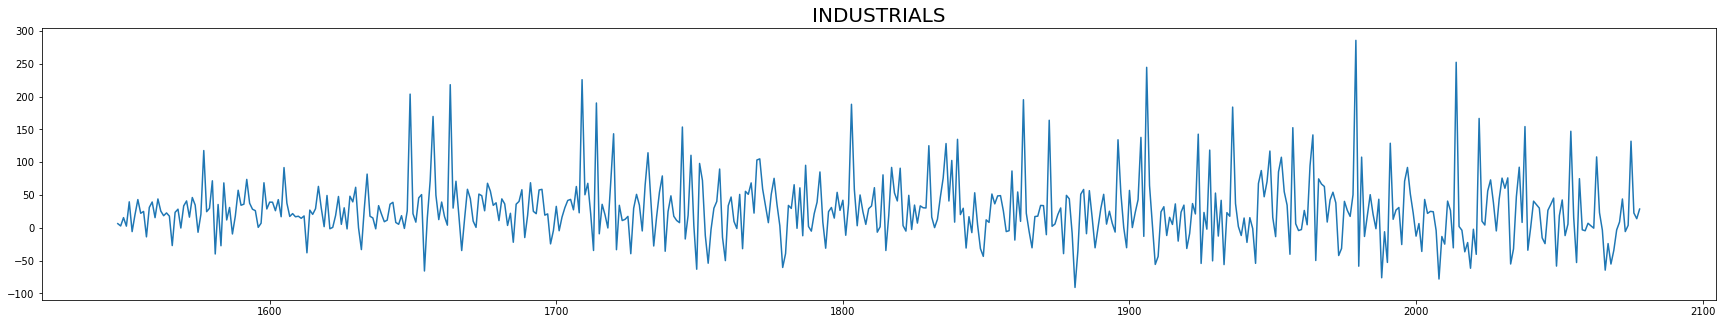

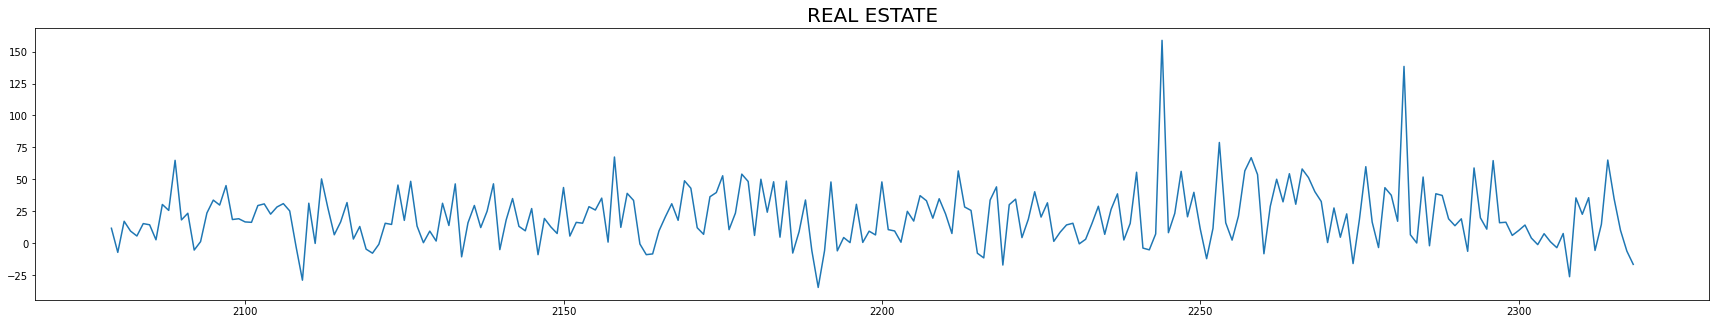

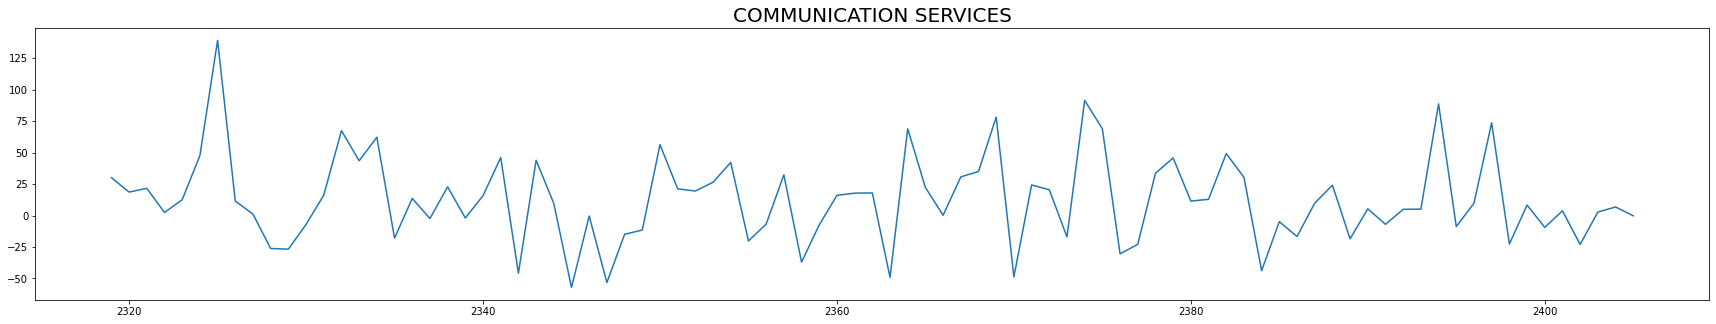

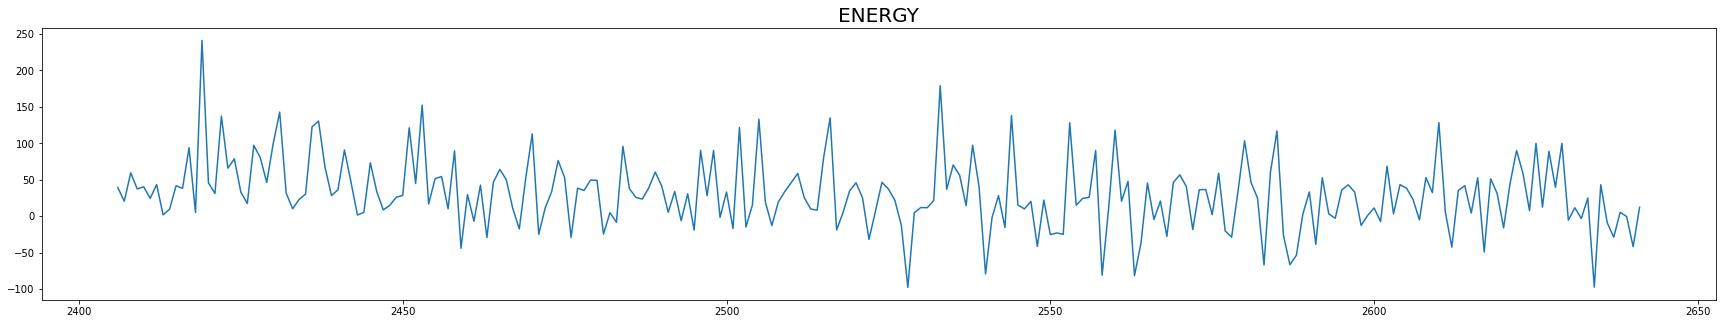

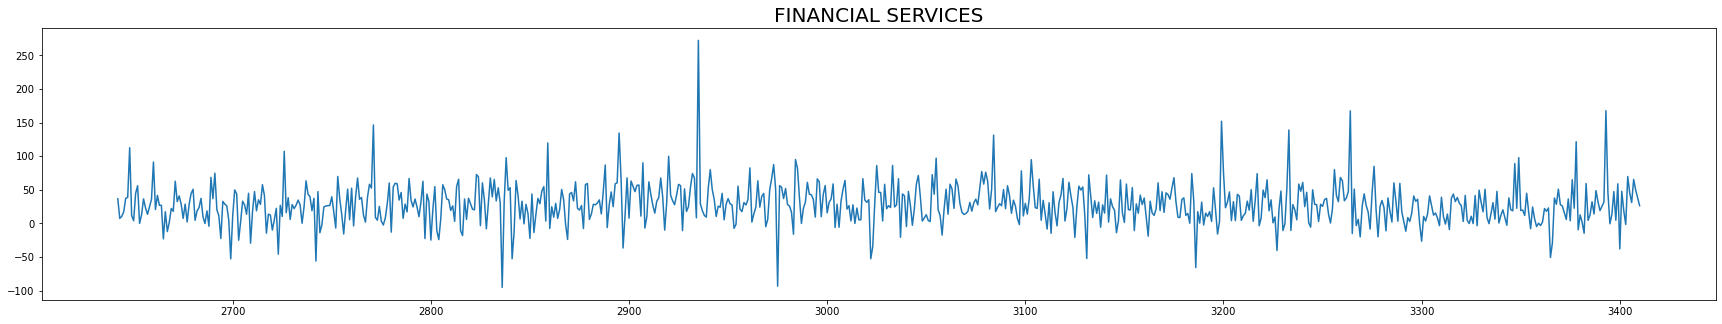

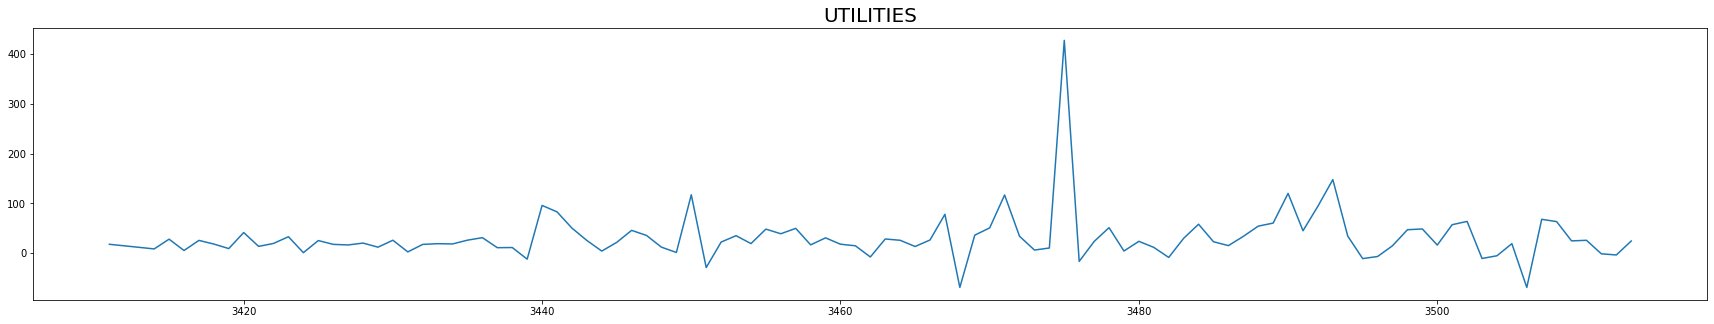

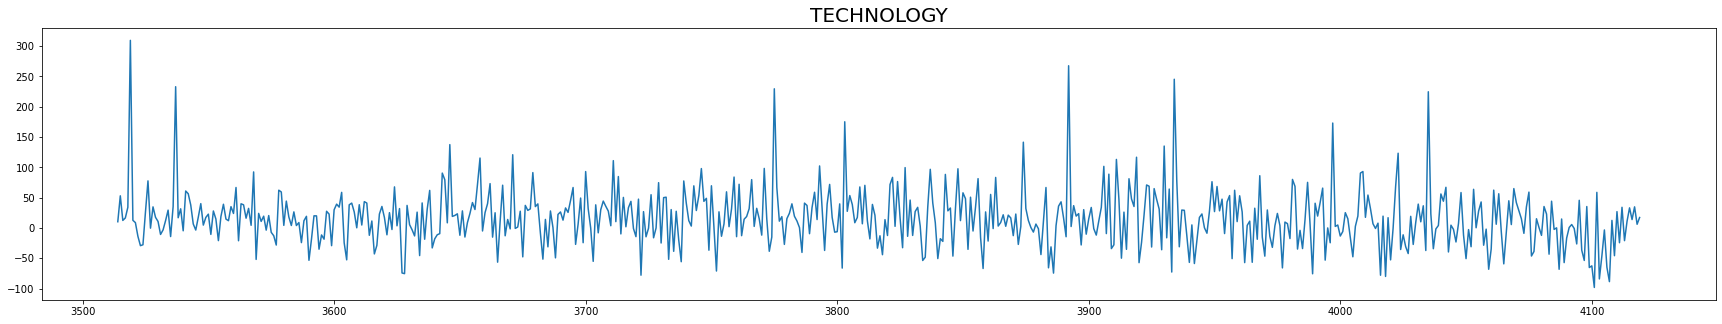

In [29]:
df2015_ = data2015.loc[:, ['Sector', '2016 PRICE VAR [%]']]
sector_list = df2015_['Sector'].unique()

for sector in sector_list:
    
    temp = df2015_[df2015_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Now that's much better! We don't have any major peak, and the remaining ones are somewhat reasonable values.

Still, even if we removed all those fake top gainers, we cannot be fully certain that the remaining stocks have undergone an organic trading process during 2016.

### Eliminate missing values

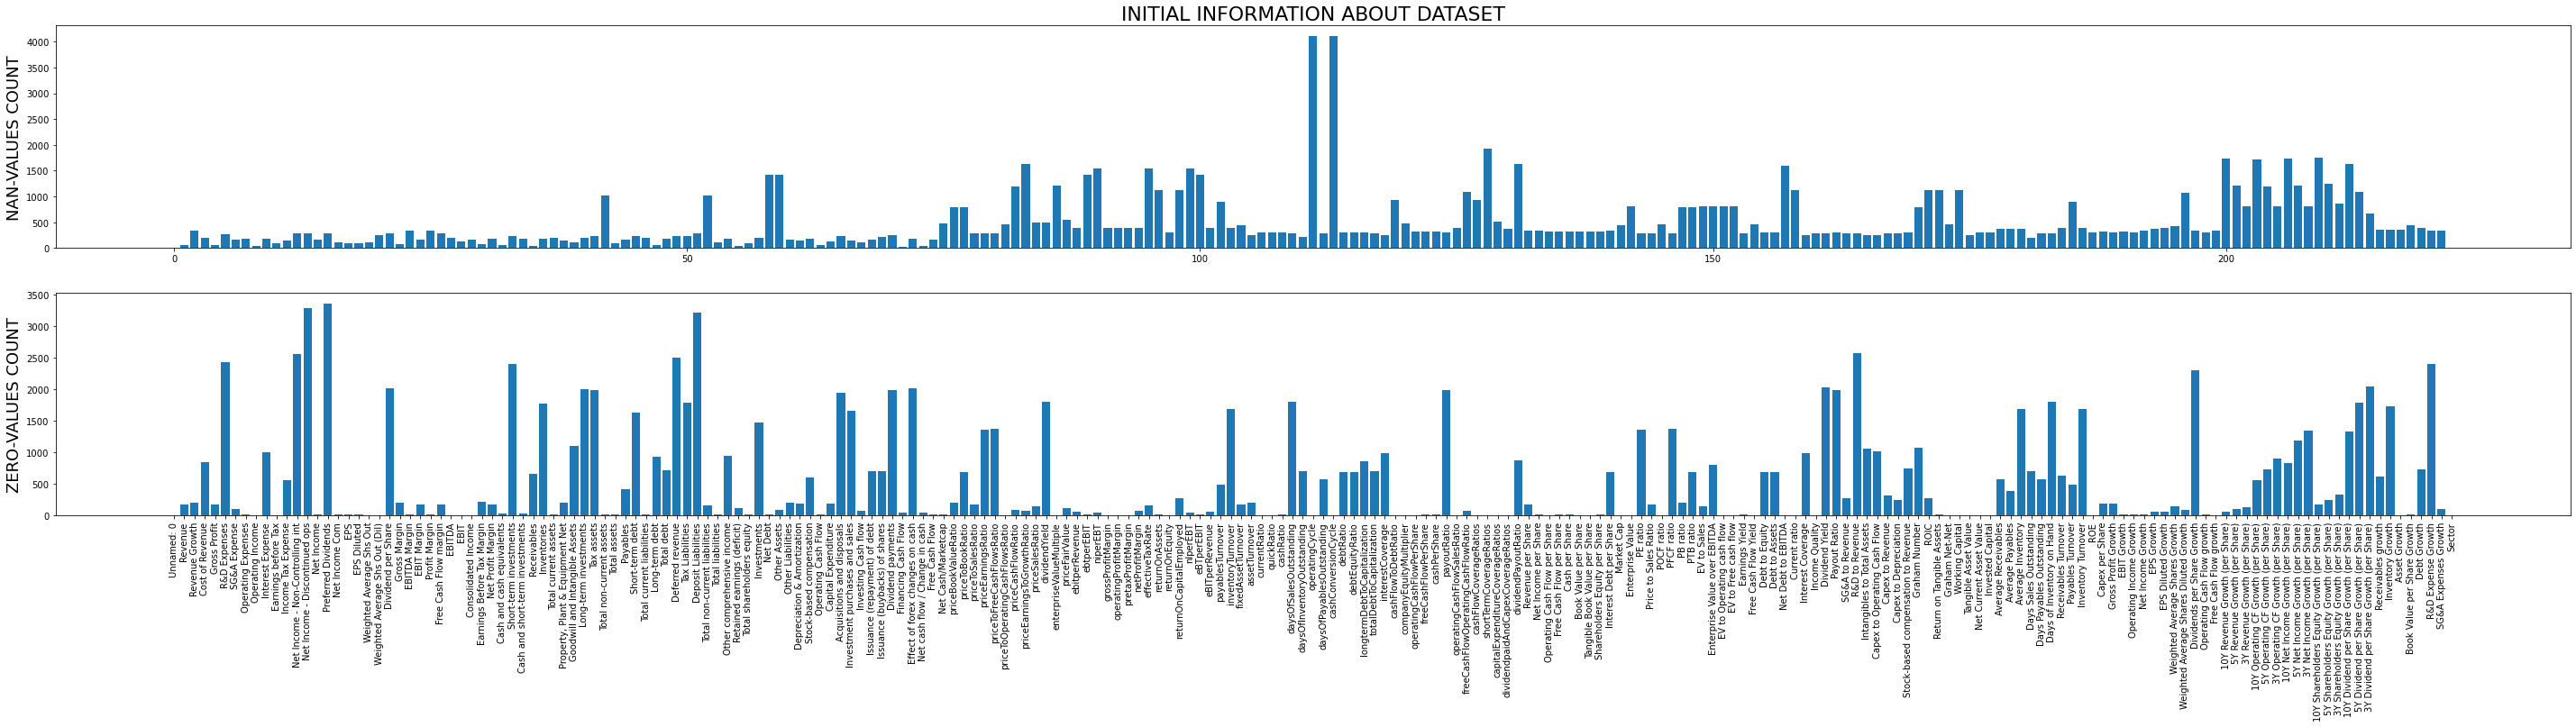

In [30]:
class_data = data2015.loc[:, ['Class', '2016 PRICE VAR [%]']]
data2015.drop(['Class', '2016 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = data2015.isna().sum()
zero_vals = data2015.isin([0]).sum()
ind = np.arange(data2015.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

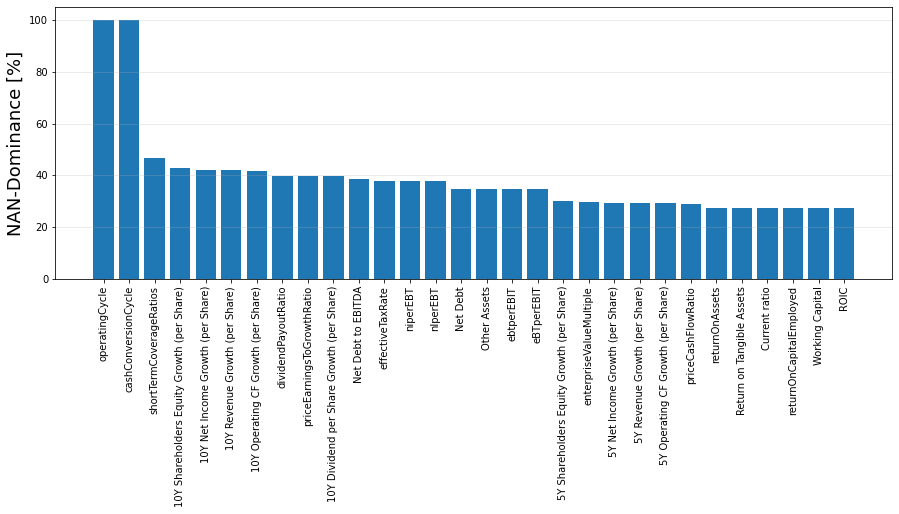

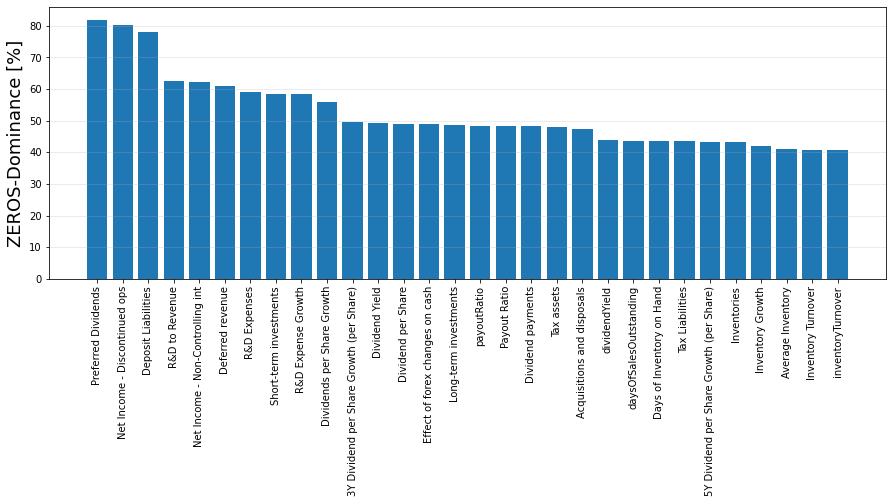

In [31]:
# Find count and percent of nan-values, zero-values
total_nans = data2015.isnull().sum().sort_values(ascending=False)
percent_nans = (data2015.isnull().sum()/data2015.isnull().count() * 100).sort_values(ascending=False)
total_zeros = data2015.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (data2015.isin([0]).sum()/data2015.isin([0]).count() * 100).sort_values(ascending=False)
data2015_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
data2015_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2015_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2015_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2015_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2015_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

The two plots above clearly show that to improve the quality of the dataframe df we need to:

fill the missing data
fill or drop those indicators that are heavy zeros-dominant.
What levels of nan-dominance and zeros-dominance are we going to tolerate?

I usually determine a threshold level for both nan-dominance and zeros-dominance, which corresponds to a given percentage of the total available samples (rows): if a column has a percentage of nan-values and/or zero-valued entries higher than the threshold, I drop it.

For this specific case we know that we have about 3800 samples, so I reckon we can set:

nan-dominance threshold = 5-7%
zeros-dominance threshold = 5-10%
Once the threshold levels have been set, I iteratively compute the .quantile() of both df_nans and df_zeros in order to find the number of financial indicators that I will be dropping. In this case, we can see that:

We need to drop the top 50% (test_nan_level=1-0.5=0.5) nan-dominant financial indicators in order to not have columns with more than 226 nan values, which corresponds to a nan-dominance threshold of 5.9% (aligned with our initial guess).
We need to drop the top 40% (test_zeros_level=1-0.4=0.6) zero-dominant financial indicators in order to not have columns with more than 283 0 values, which corresponds to a zero-dominance threshold of 7.5% (aligned with our initial guess).

In [ ]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(data2015_nans.quantile(test_nan_level))
_, thresh_nan = data2015_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(data2015_zeros.quantile(test_zeros_level))
_, thresh_zeros = data2015_zeros.quantile(test_zeros_level)

In [ ]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {data2015.shape[1]}')
print()

data2015_test1 = data2015.drop((data2015_nans[data2015_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {data2015_test1.shape[1]}')
print()

data2015_zeros_postnan = data2015_zeros.drop((data2015_nans[data2015_nans['Percent NaN'] > thresh_nan]).index, axis=0)
data2015_test2 = data2015_test1.drop((data2015_zeros_postnan[data2015_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {data2015_test2.shape[1]}')

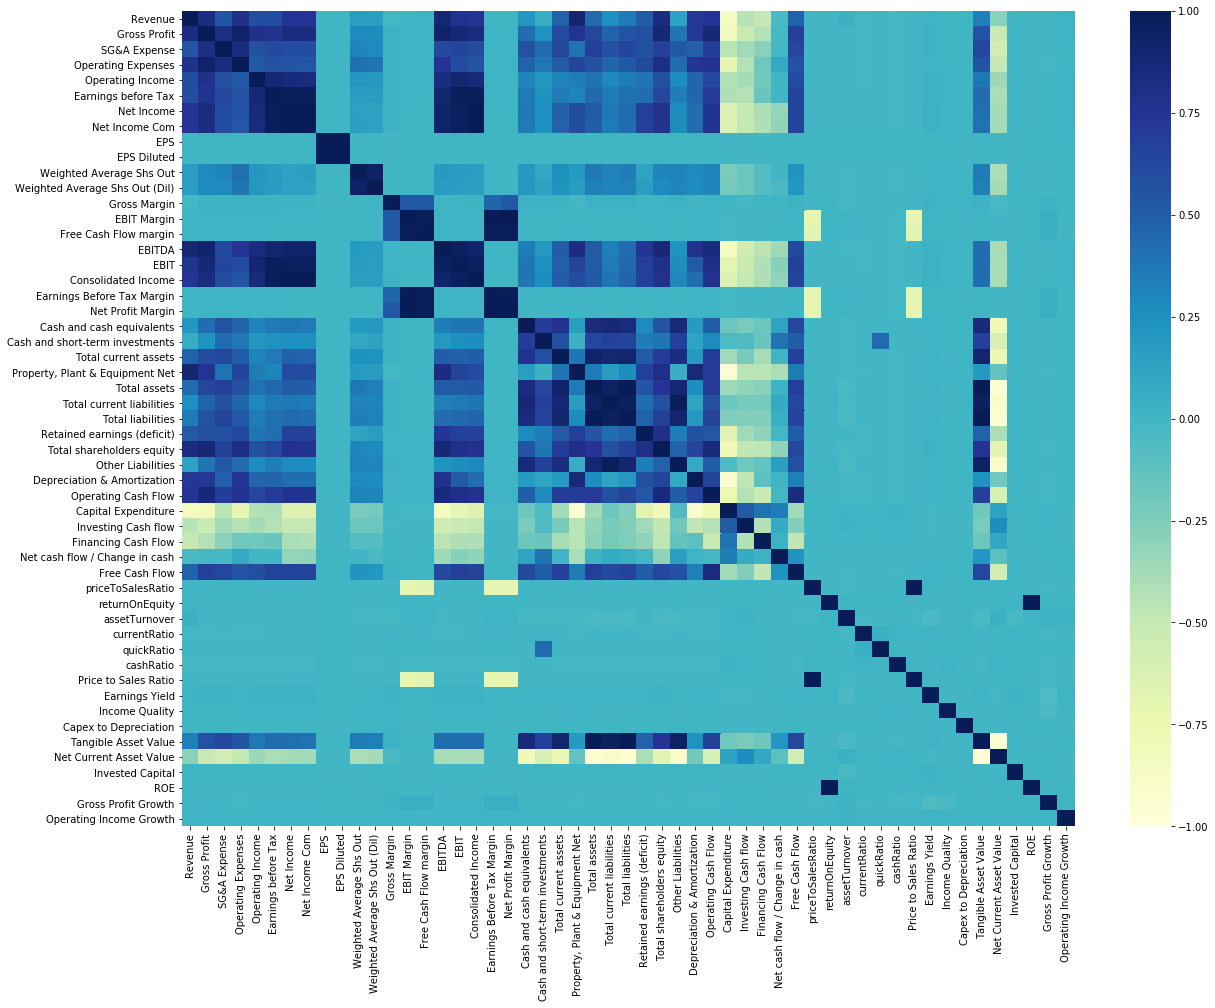

In [36]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data2015_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

## HANDLE EXTREME VALUES

In [16]:
data2015_test2.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Price to Sales Ratio,Earnings Yield,Income Quality,Capex to Depreciation,Tangible Asset Value,Net Current Asset Value,Invested Capital,ROE,Gross Profit Growth,Operating Income Growth
count,4044.000,4045.000,3941.000,3936.000,4068.000,4008.000,3948.000,3992.000,4015.000,4021.000,...,3831.000,3832.000,3828.000,3827.000,3855.000,3811.000,3810.000,3809.000,3799.000,3799.000
mean,5014196712.283,1888666187.504,840464682.793,1358920655.995,508414537.063,410334567.057,326472605.926,324734358.850,-23445.093,-23410.154,...,203.104,-0.341,1.350,-11.544,15964106374.363,-8308224120.456,-2151249922039.007,2167.484,0.204,-0.831
std,34595512035.457,8408545892.675,3491097300.931,5200467395.224,2777586282.013,2427154524.164,2296813393.430,2280862109.775,1214629.222,1213722.780,...,6770.891,5.910,25.586,460.279,108939867606.070,61712660181.187,133865924580723.734,133770.866,5.289,33.178
min,-335702000.000,-12808000000.000,0.000,-5495511687.993,-19339000000.000,-19109000000.000,-14567000000.000,-14738000000.000,-75340364.661,-75340364.661,...,0.000,-244.000,-526.000,-28088.976,-8353604271.729,-1303347000000.000,-8262879827869730.000,-969.388,-224.483,-1514.643
25%,58718500.000,28026000.000,17158000.000,34235750.000,-5739133.363,-10495094.000,-10228760.500,-11022982.750,-0.500,-0.500,...,0.692,-0.053,0.338,-1.573,160656500.000,-1551584000.000,89729250.000,-0.072,-0.056,-0.368
50%,409767500.000,178417000.000,75600000.000,147612000.000,31168250.000,19666000.000,15418500.000,14750500.000,0.590,0.580,...,1.747,0.032,1.195,-0.870,825981000.000,-105527000.000,783103500.000,0.071,0.042,0.015
75%,2219607000.000,834000000.000,357000000.000,620067750.000,234973301.148,173235000.000,136947000.000,135740653.242,1.860,1.820,...,3.979,0.062,2.032,-0.419,3757229500.000,32731500.000,4200525000.000,0.143,0.190,0.301
max,1886894000000.000,305367000000.000,93418000000.000,93418000000.000,71230000000.000,72515000000.000,86549000000.000,86549000000.000,1343.348,1343.348,...,377315.796,76.153,826.733,10.874,2353640000000.000,71785000000.000,2414241000000.000,8255949.333,189.112,604.500


In [32]:
# Cut outliers
top_quantiles = data2015_test2.quantile(0.97)
outliers_top = (data2015_test2 > top_quantiles)

low_quantiles = data2015_test2.quantile(0.03)
outliers_low = (data2015_test2 < low_quantiles)

data2015_test2 = data2015_test2.mask(outliers_top, top_quantiles, axis=1)
data2015_test2 = data2015_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
data2015_test2.describe()

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
count,4044.000,3774.000,3918.000,4045.000,3848.000,3941.000,3936.000,4068.000,3935.000,4008.000,...,2473.000,3014.000,3443.000,3746.000,3745.000,3745.000,3659.000,3717.000,3764.000,3767.000
mean,3130991559.614,0.104,1700344563.122,1269856288.386,33043969.387,555476668.344,909972677.899,360204381.126,61029611.633,291028118.174,...,-0.023,0.022,0.010,0.096,0.023,0.162,0.050,0.192,0.083,0.134
std,6911420982.736,0.373,3872334219.101,2976417746.613,100938160.602,1304242103.176,2048725938.043,922286205.985,136757874.643,813342471.431,...,0.222,0.138,0.169,0.513,0.201,0.479,0.475,0.765,0.287,0.324
min,0.000,-0.490,0.000,0.000,0.000,870210.666,3846334.250,-282990000.000,0.000,-437291000.000,...,-1.000,-0.450,-0.589,-0.710,-0.402,-0.373,-0.857,-0.914,-0.307,-0.303
25%,58718500.000,-0.052,3000000.000,28026000.000,0.000,17158000.000,34235750.000,-5739133.363,0.000,-10495094.000,...,0.000,0.000,0.000,-0.108,-0.011,-0.053,-0.132,-0.064,0.000,-0.033
50%,409767500.000,0.032,144953000.000,178417000.000,0.000,75600000.000,147612000.000,31168250.000,2900000.000,19666000.000,...,0.000,0.000,0.000,0.000,0.000,0.034,0.010,0.000,0.000,0.052
75%,2219607000.000,0.160,1155021000.000,834000000.000,11295427.000,357000000.000,620067750.000,234973301.148,44695500.000,173235000.000,...,0.034,0.041,0.035,0.144,0.022,0.169,0.111,0.165,0.000,0.188
max,32589120000.000,1.524,17924347057.546,14568145735.747,522968520.000,6378000000.000,9826669435.396,4377774896.142,625920000.000,3823057151.335,...,0.227,0.398,0.442,2.106,0.709,2.087,1.757,3.454,1.235,1.320


## FILL MISSING VALUES

In [33]:
# Replace nan-values with mean value of column, considering each sector individually.
data2015_test2 = data2015_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


In [34]:
# Add the sector column
data2015_out = data2015_test2.join(data2015['Sector'])

# Add back the classification columns
data2015_out = data2015_out.join(class_data)

# Print information about dataset
data2015_out.info()
data2015_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110 entries, 0 to 4119
Columns: 224 entries, Revenue to 2016 PRICE VAR [%]
dtypes: float64(222), int64(1), object(1)
memory usage: 7.2+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,2016 PRICE VAR [%]
count,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,...,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000,4110.000
mean,3127671647.479,0.103,1667074510.410,1271110869.722,31769605.134,563449253.815,917886138.688,360204619.186,60561198.118,291113680.349,...,0.010,0.093,0.022,0.159,0.049,0.193,0.080,0.132,0.701,19.860
std,6858454833.365,0.358,3787807088.736,2954273564.426,97922690.748,1278599689.075,2007188724.333,917686010.799,134124233.089,803551498.399,...,0.155,0.491,0.192,0.459,0.449,0.728,0.276,0.311,0.458,50.207
min,0.000,-0.490,0.000,0.000,0.000,870210.666,3846334.250,-282990000.000,0.000,-437291000.000,...,-0.589,-0.710,-0.402,-0.373,-0.857,-0.914,-0.307,-0.303,0.000,-99.948
25%,60543574.500,-0.042,5293000.000,28652000.000,0.000,18271204.250,36569386.750,-5475375.271,0.000,-9509000.000,...,0.000,-0.093,-0.002,-0.042,-0.114,-0.045,0.000,-0.024,0.000,-5.218
50%,429573000.000,0.043,175645500.000,188142000.000,0.000,86772500.000,164571000.000,32500613.965,3823000.000,22916000.000,...,0.000,0.000,0.000,0.047,0.024,0.000,0.000,0.063,1.000,17.185
75%,2387475000.000,0.151,1100117500.000,879627000.000,12344750.000,435761000.000,758800000.000,244620750.000,45475000.000,189548000.000,...,0.038,0.140,0.022,0.159,0.100,0.209,0.010,0.176,1.000,40.324
max,32589120000.000,1.524,17924347057.546,14568145735.747,522968520.000,6378000000.000,9826669435.396,4377774896.142,625920000.000,3823057151.335,...,0.442,2.106,0.709,2.087,1.757,3.454,1.235,1.320,1.000,455.432
